In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


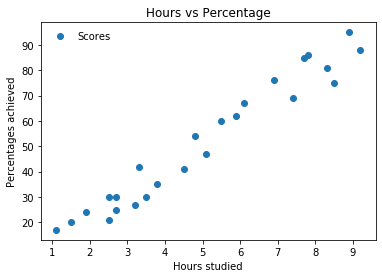

In [3]:
df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentages achieved")
plt.legend(frameon=False)
plt.show()

In [4]:
a = df.iloc[:,:-1].values
b = df['Scores'].values

In [5]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

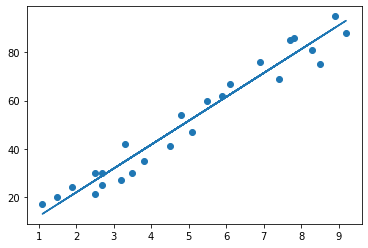

In [7]:
line = regressor.coef_*a + regressor.intercept_

plt.scatter(a,b)
plt.plot(a , line)
plt.show()

In [8]:
print(a_test)
b_pred = regressor.predict(a_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
df1 = pd.DataFrame({"Actual":b_test,"Predicted scores":b_pred})
df1

,Actual,Predicted scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
hrs = 9.25
ownpred = regressor.predict([[hrs]])
print("Number of hours: {}".format(hrs))
print("Predicted scores: {}".format(ownpred[0]))

Number of hours: 9.25
Predicted scores: 93.69173248737538


In [11]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(b_test,b_pred))

Mean Absolute Error: 4.183859899002975
